<a href="https://colab.research.google.com/github/Vayuputra2401/Heart_Arrythmia_Prediction/blob/main/Heart_Disease_Data_PreProcessing_and_EDA_Basic_Model_Evaluation_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [203]:
df1=pd.read_csv("heart.csv")

In [204]:
df=df1.copy() ## Making a copy of dataset

In [205]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [206]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [207]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [208]:
# Renaming columns
df1.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [209]:
pd.options.mode.chained_assignment = None
df1['sex'][df1['sex'] == 0] = 'Female'
df1['sex'][df1['sex'] == 1] = 'Male'

df1['chest_pain_type'][df1['chest_pain_type'] == 0] = 'Typical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 1] = 'Atypical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 2] = 'Non-anginal pain'
df1['chest_pain_type'][df1['chest_pain_type'] == 3] = 'Asymptomatic'

df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 0] = 'Lower than 120mg/ml'
df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 1] = 'Greater than 120mg/ml'

df1['rest_ecg'][df1['rest_ecg'] == 0] = 'Normal'
df1['rest_ecg'][df1['rest_ecg'] == 1] = 'ST-T wave abnormality'
df1['rest_ecg'][df1['rest_ecg'] == 2] = 'Left ventricular hypertrophy'

df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 0] = 'No'
df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 1] = 'Yes'

df1['st_slope'][df1['st_slope'] == 0] = 'Upsloping'
df1['st_slope'][df1['st_slope'] == 1] = 'Flat'
df1['st_slope'][df1['st_slope'] == 2] = 'Downsloping'

df1['thalassemia'][df1['thalassemia'] == 0] = 'Normal'
df1['thalassemia'][df1['thalassemia'] == 1] = 'Fixed defect'
df1['thalassemia'][df1['thalassemia'] == 2] = 'Reversable defect'

df1['condition'][df1['condition'] == 0] = 'No'
df1['condition'][df1['condition'] == 1] = 'Yes'


In [210]:
df1.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,52,Male,Typical angina,125,212,Lower than 120mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,2,3,No
1,53,Male,Typical angina,140,203,Greater than 120mg/ml,Normal,155,Yes,3.1,Upsloping,0,3,No
2,70,Male,Typical angina,145,174,Lower than 120mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,0,3,No
3,61,Male,Typical angina,148,203,Lower than 120mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,1,3,No
4,62,Female,Typical angina,138,294,Greater than 120mg/ml,ST-T wave abnormality,106,No,1.9,Flat,3,Reversable defect,No
5,58,Female,Typical angina,100,248,Lower than 120mg/ml,Normal,122,No,1.0,Flat,0,Reversable defect,Yes
6,58,Male,Typical angina,114,318,Lower than 120mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,3,Fixed defect,No
7,55,Male,Typical angina,160,289,Lower than 120mg/ml,Normal,145,Yes,0.8,Flat,1,3,No
8,46,Male,Typical angina,120,249,Lower than 120mg/ml,Normal,144,No,0.8,Downsloping,0,3,No
9,54,Male,Typical angina,122,286,Lower than 120mg/ml,Normal,116,Yes,3.2,Flat,2,Reversable defect,No


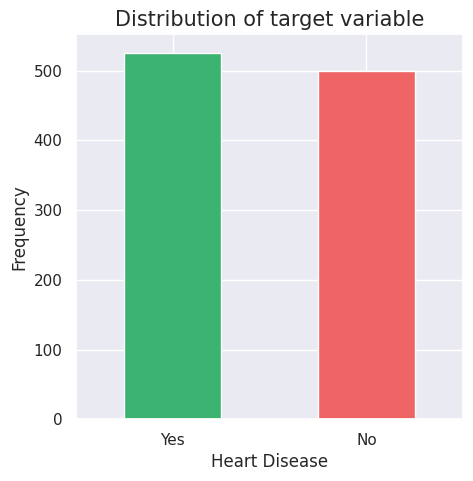

In [211]:
sns.set(style="darkgrid")
df1.condition.value_counts().plot(kind="bar",figsize=(5,5),color=['#3CB371','#EE6363'])
plt.title('Distribution of target variable',fontsize=15)
plt.xlabel('Heart Disease',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [212]:
countNoDisease = len(df1[df1.condition == "No"])
countHaveDisease = len(df1[df1.condition == "Yes"])
print("Percentage of Patients do not have Heart Disease: {:.2f}%".format((countNoDisease / (len(df1.condition)) * 100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df1.condition)) * 100)))

Percentage of Patients do not have Heart Disease: 48.68%
Percentage of Patients have Heart Disease: 51.32%


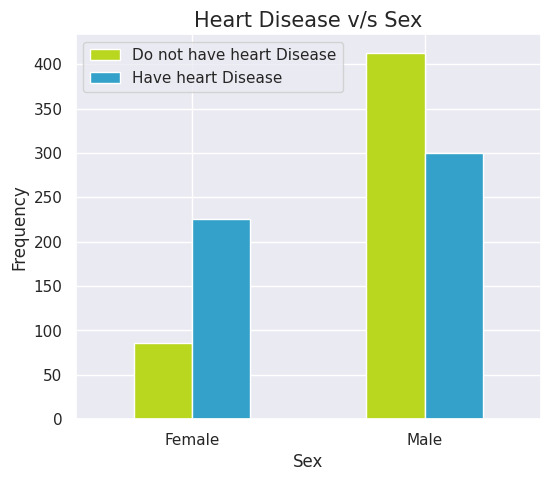

In [213]:
sns.set(style="darkgrid")
pd.crosstab(df1.sex,df1.condition).plot(kind="bar",figsize=(6,5),color=['#BAD720',"#33A1C9"])
plt.title('Heart Disease v/s Sex',fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Do not have heart Disease", "Have heart Disease"])
plt.ylabel('Frequency',fontsize=12)
plt.show()

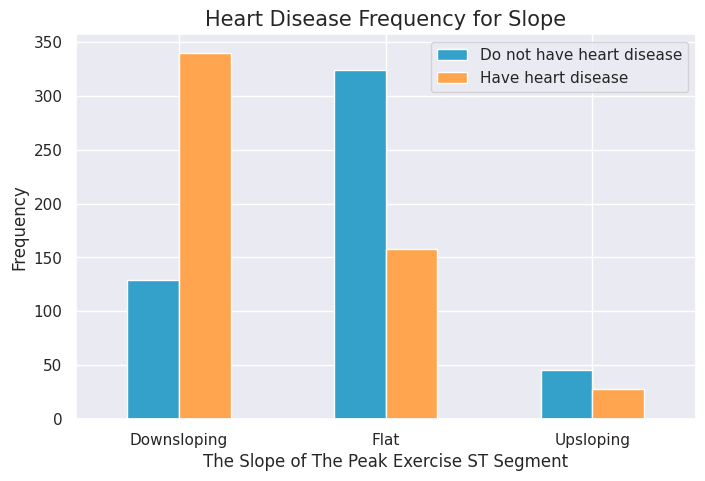

In [214]:
sns.set(style="darkgrid")
pd.crosstab(df1.st_slope, df1.condition).plot(kind="bar", figsize=(8,5), color=["#33A1C9", "#FFA54F"], ax=plt.gca())
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.title("Heart Disease Frequency for Slope",fontsize=15)
plt.xlabel("The Slope of The Peak Exercise ST Segment",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Downsloping","Flat","Upsloping"])
plt.ylabel("Frequency",fontsize=12)
plt.show()

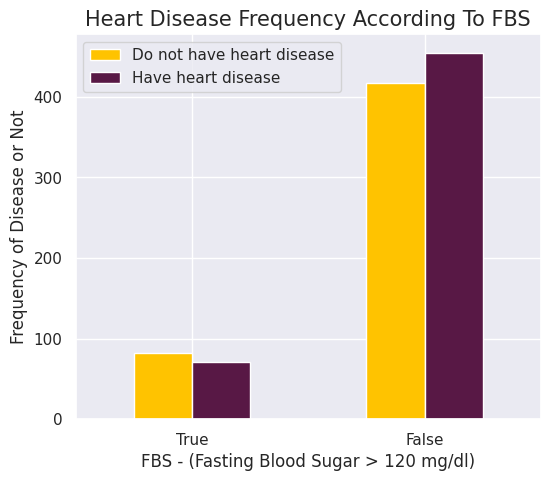

In [215]:
sns.set(style="darkgrid")
pd.crosstab(df1.fasting_blood_sugar, df1.condition).plot(kind="bar", figsize=(6,5), color=["#FFC300", "#581845"], ax=plt.gca())
plt.title("Heart Disease Frequency According To FBS",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)",fontsize=12)
plt.gca().set_xticklabels(labels=["True", "False"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()

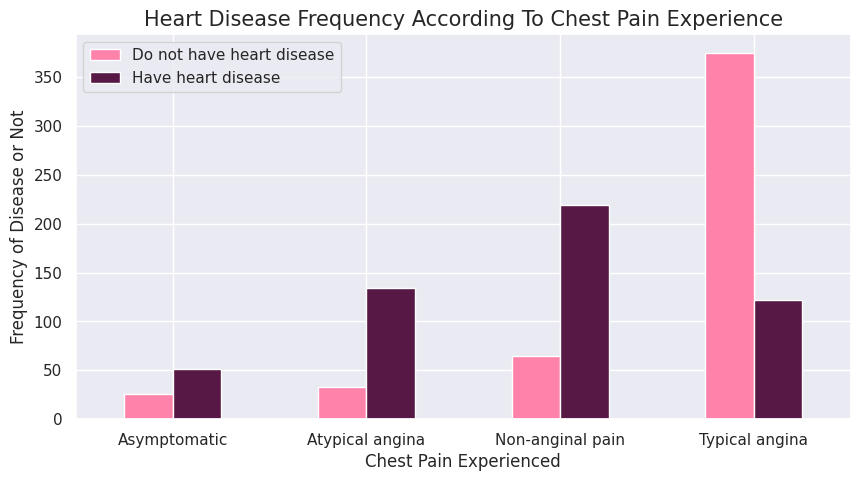

In [216]:
sns.set(style="darkgrid")
pd.crosstab(df1.chest_pain_type, df1.condition).plot(kind="bar", figsize=(10, 5), color=["#FF82AB", "#581845"], ax=plt.gca())
plt.title("Heart Disease Frequency According To Chest Pain Experience",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Chest Pain Experienced",fontsize=12)
plt.gca().set_xticklabels(
    labels=["Asymptomatic","Atypical angina","Non-anginal pain","Typical angina"]
)
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()

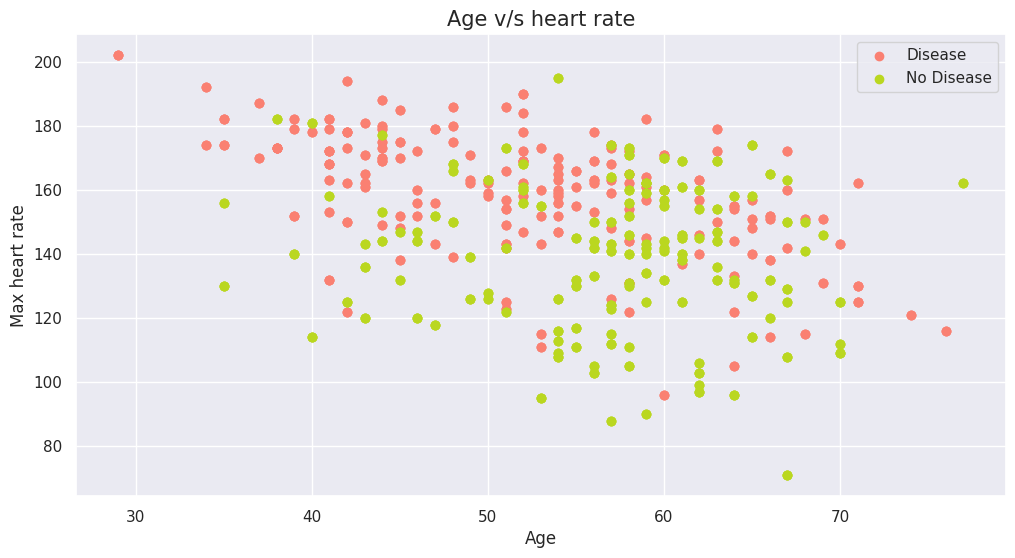

In [217]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

plt.scatter(df1.age[df1.condition=='Yes'], df1.max_heart_rate_achieved[df1.condition=='Yes'],color='salmon')
plt.scatter(df1.age[df1.condition=='No'], df1.max_heart_rate_achieved[df1.condition=='No'],color='#BAD720')

plt.title('Age v/s heart rate',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Max heart rate',fontsize=12)
plt.legend(['Disease','No Disease'])

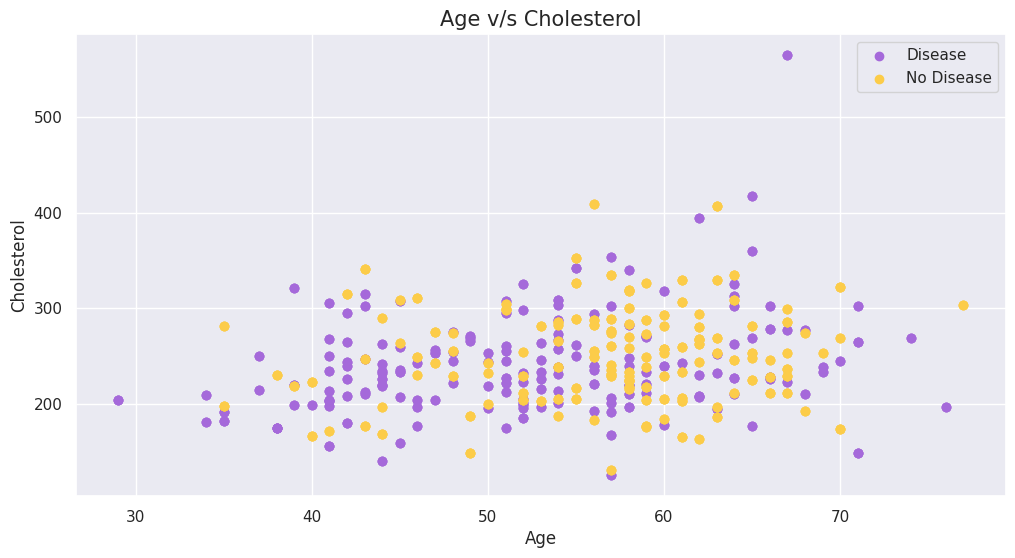

In [218]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

plt.scatter(df1.age[df1.condition=='Yes'], df1.cholesterol[df1.condition=='Yes'],color='#A569DA')
plt.scatter(df1.age[df1.condition=='No'], df1.cholesterol[df1.condition=='No'],color='#FCCC49')

plt.title('Age v/s Cholesterol',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Cholesterol',fontsize=12)
plt.legend(['Disease','No Disease']);

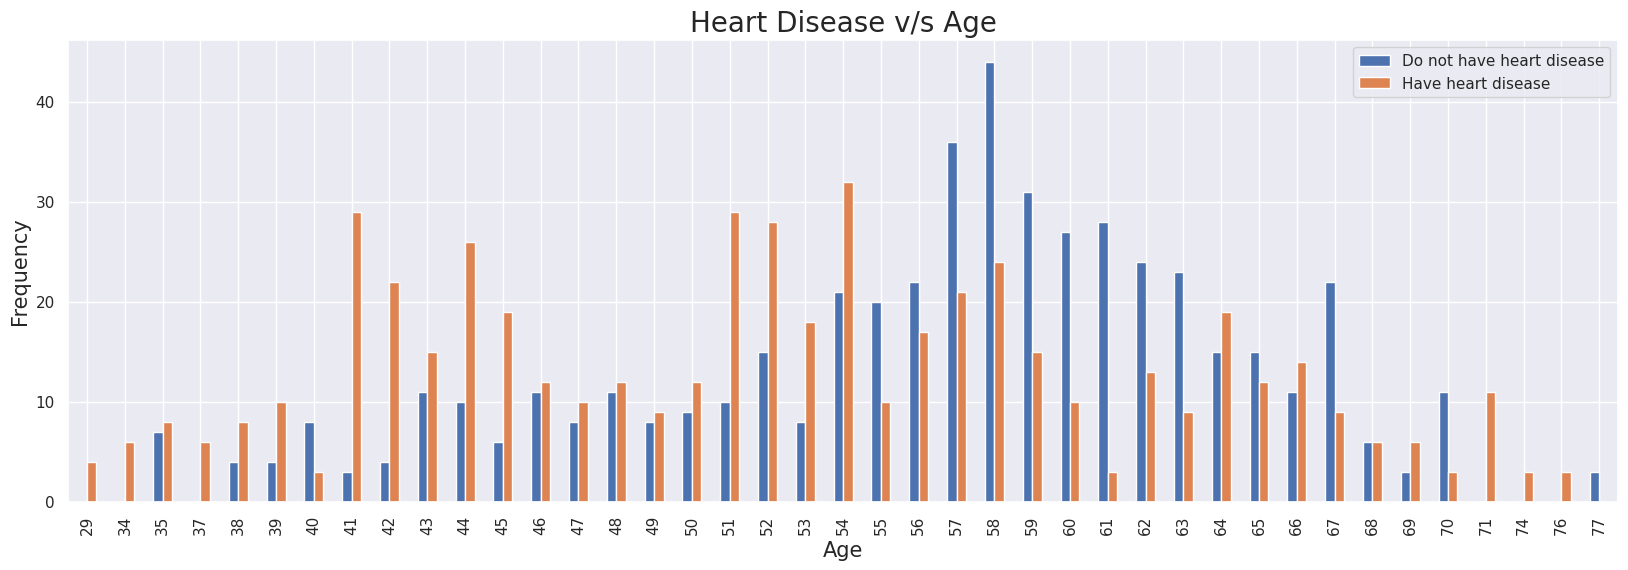

In [219]:
sns.set(style="darkgrid")
pd.crosstab(df1.age, df1.condition).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease v/s Age",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

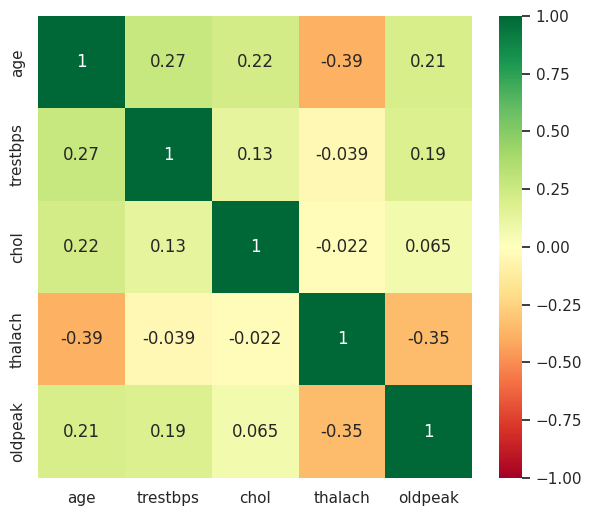

In [220]:
corr = df[['age','trestbps','chol','thalach','oldpeak']].corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="RdYlGn")
plt.show()

From the correlation heatmap, we observe following things:

-higher age ->  more likely heart disease

-higher blood sugar -> more likely heart disease

-higher cholesterol -> more likely heart disease

-lower maximum achieved heart rate -> more likely heart disease

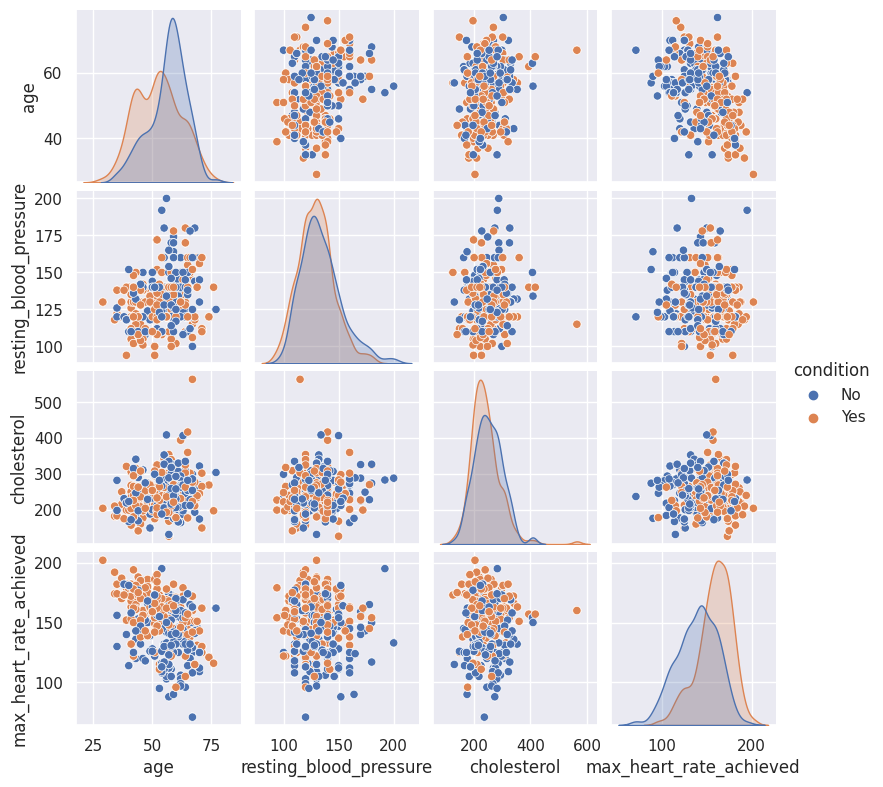

In [221]:
sns.set(style="darkgrid")
sns.pairplot(df1[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']+['condition']], hue='condition', height=2)
plt.show()

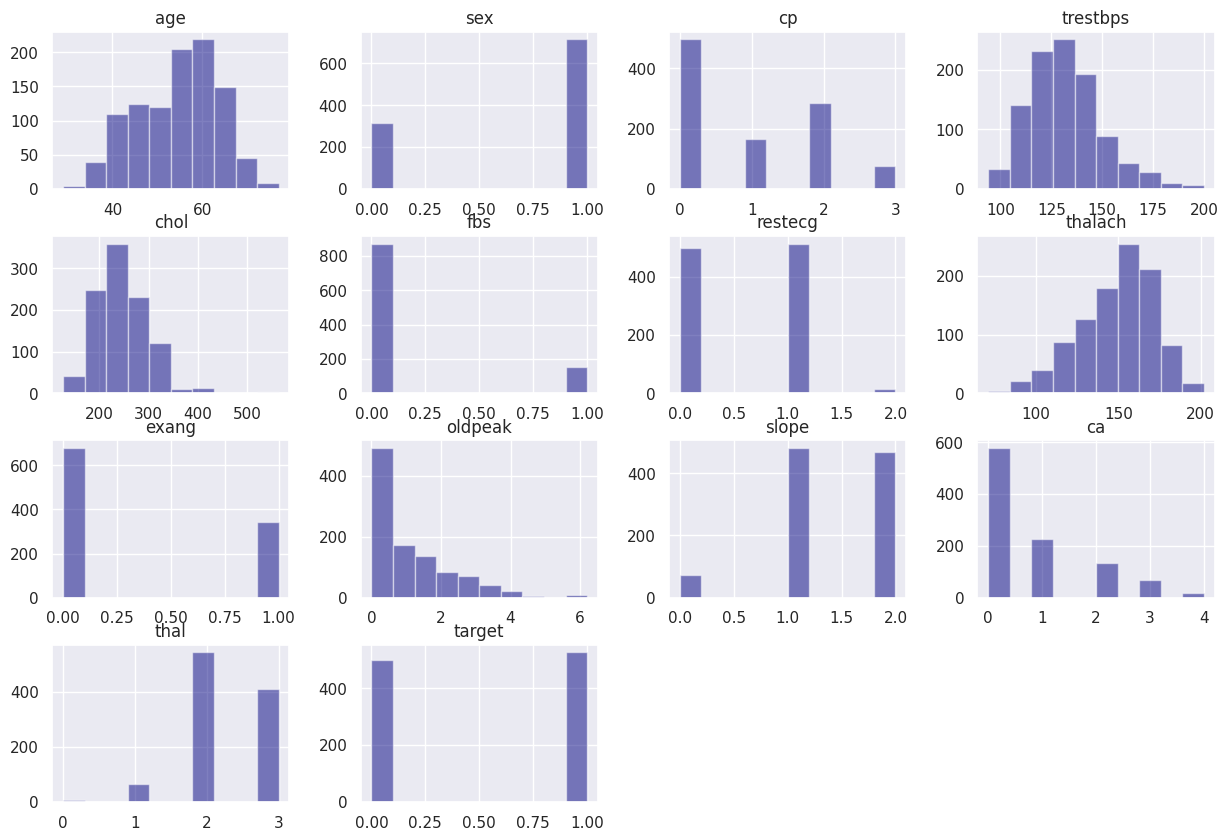

In [222]:
sns.set(style="darkgrid")
df.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

## Outlier Treatment

In [223]:
df = df.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

## Creating Dummy Variables using One Hot Encoding

In [224]:
a = pd.get_dummies(df["cp"], prefix="cp",drop_first=True)
b = pd.get_dummies(df["thal"], prefix="thal",drop_first=True)
c = pd.get_dummies(df["slope"], prefix="slope",drop_first=True)
d = pd.get_dummies(df["ca"], prefix="ca",drop_first=True)
e = pd.get_dummies(df["restecg"], prefix="restecg",drop_first=True)

In [225]:
frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_2,thal_3,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,restecg_1,restecg_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,1,0,1,0,1,0,0,1,0
1,53,1,0,140,203,1,0,155,1,3.1,...,0,1,0,0,0,0,0,0,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,1,0,0,0,0,0,0,1,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,1,0,1,1,0,0,0,1,0
4,62,0,0,138,294,1,1,106,0,1.9,...,1,0,1,0,0,0,1,0,1,0


In [226]:
df = df.drop(columns=["cp", "thal", "slope","ca","restecg"])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,thal_2,thal_3,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,0,0,...,0,1,0,1,0,1,0,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,70,1,145,174,0,125,1,2.6,0,0,...,0,1,0,0,0,0,0,0,1,0
3,61,1,148,203,0,161,0,0.0,0,0,...,0,1,0,1,1,0,0,0,1,0
4,62,0,138,294,1,106,0,1.9,0,0,...,1,0,1,0,0,0,1,0,1,0


## Scaling the data

In [227]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

## Univariate Feature Selection using SelectKBest

In [228]:
X = df[df.columns.difference(['target'])]
SKB = SelectKBest(f_classif, k=15).fit(X, np.ravel(df[['target']]) )

In [229]:
imp_vars_SKB = list(X.columns[SKB.get_support()])
imp_vars_SKB

['age',
 'ca_1',
 'ca_2',
 'ca_3',
 'cp_1',
 'cp_2',
 'exang',
 'oldpeak',
 'restecg_1',
 'sex',
 'slope_1',
 'slope_2',
 'thal_2',
 'thal_3',
 'thalach']

In [230]:
x=df[imp_vars_SKB]
y = df.target.values

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=30)

In [232]:
print('X_train-', x_train.size)
print('X_test-',x_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 9225
X_test- 6150
y_train- 615
y_test- 410


# Logistic Regression

In [233]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)

# getting the training Set Predictions
y_train_pred = lr.predict(x_train)

# getting the test Set Predictions
y_test_pred = lr.predict(x_test)

acc = lr.score(x_test, y_test) * 100
accuracies["Logistic Regression"] = acc

In [234]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       290
           1       0.87      0.87      0.87       325

    accuracy                           0.87       615
   macro avg       0.87      0.87      0.87       615
weighted avg       0.87      0.87      0.87       615



In [235]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       196
           1       0.90      0.84      0.87       214

    accuracy                           0.87       410
   macro avg       0.87      0.87      0.87       410
weighted avg       0.87      0.87      0.87       410



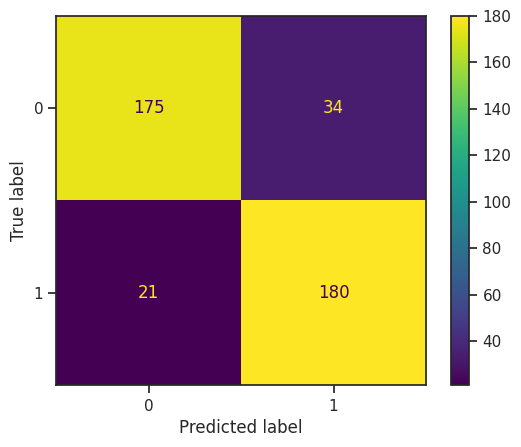

In [236]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)
plt.show()

# KNN

In [237]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_train_pred1 = knn.predict(x_train)
y_test_pred1 = knn.predict(x_test)

In [238]:
print(classification_report(y_train_pred1,y_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       295
           1       0.98      1.00      0.99       320

    accuracy                           0.99       615
   macro avg       0.99      0.99      0.99       615
weighted avg       0.99      0.99      0.99       615



In [239]:
print(classification_report(y_test_pred1,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       214
           1       0.94      0.96      0.95       196

    accuracy                           0.95       410
   macro avg       0.95      0.95      0.95       410
weighted avg       0.95      0.95      0.95       410



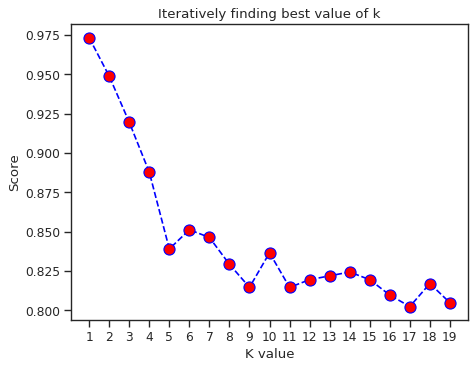

Maximum KNN Test Accuracy is 97.32% at K = 1


In [240]:
# try to find best k value
scoreList = []
for i in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn1.fit(x_train, y_train)
    scoreList.append(knn1.score(x_test, y_test))

plt.figure(dpi=80)
plt.plot(range(1, 20), scoreList,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.xticks(np.arange(1, 20, 1))
plt.title("Iteratively finding best value of k")
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
accuracies["KNN"] = acc
print("Maximum KNN Test Accuracy is {:.2f}%".format(acc),"at K =",scoreList.index(max(scoreList))+1)

In [241]:
knn2 = KNeighborsClassifier(n_neighbors=4)
knn2.fit(x_train, y_train)
y_train_pred1 = knn2.predict(x_train)
y_test_pred1 = knn2.predict(x_test)

In [242]:
print(classification_report(y_train_pred1,y_train))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       321
           1       0.90      0.99      0.94       294

    accuracy                           0.94       615
   macro avg       0.95      0.95      0.94       615
weighted avg       0.95      0.94      0.94       615



In [243]:
print(classification_report(y_test_pred1,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.89       229
           1       0.84      0.93      0.88       181

    accuracy                           0.89       410
   macro avg       0.89      0.89      0.89       410
weighted avg       0.89      0.89      0.89       410



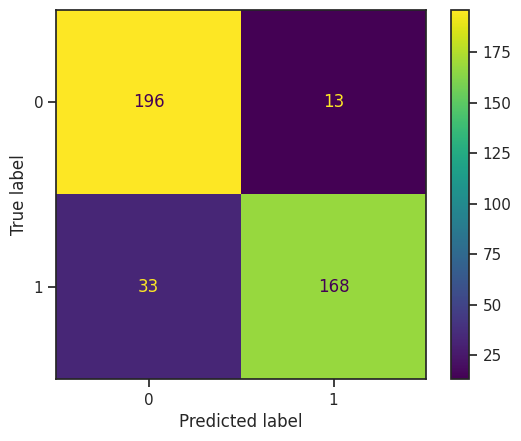

In [244]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn2, x_test, y_test)
plt.show()

# Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       296
           1       0.85      0.87      0.86       319

    accuracy                           0.85       615
   macro avg       0.85      0.85      0.85       615
weighted avg       0.85      0.85      0.85       615

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       209
           1       0.81      0.81      0.81       201

    accuracy                           0.81       410
   macro avg       0.81      0.81      0.81       410
weighted avg       0.81      0.81      0.81       410



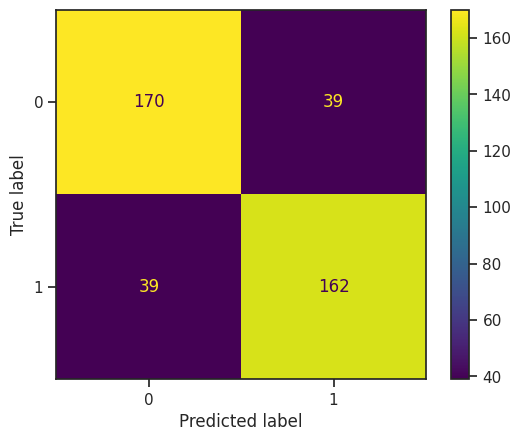

In [245]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_train_pred2 = nb.predict(x_train)
y_test_pred2 = nb.predict(x_test)

acc = nb.score(x_test, y_test) * 100
accuracies["Naive Bayes"] = acc
print(classification_report(y_train_pred2,y_train))
print(classification_report(y_test_pred2,y_test))
ConfusionMatrixDisplay.from_estimator(nb, x_test, y_test)
plt.show()

# Decision Tree

In [246]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test) * 100
accuracies["Decision Tree"] = acc
print("Decision Tree Test Accuracy is {:.2f}%".format(acc))

Decision Tree Test Accuracy is 94.63%


In [247]:
#hyperparameter tuning for decision tree
param_dist = {'max_depth': np.arange(1, 7),
             'max_features': np.arange(1,7) , "min_samples_leaf": np.arange(1,7),"criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(dtc, param_dist, cv = 5)

tree_cv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6]),
                                        'max_features': array([1, 2, 3, 4, 5, 6]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6])})

In [248]:
(tree_cv.best_params_)

{'min_samples_leaf': 5,
 'max_features': 2,
 'max_depth': 6,
 'criterion': 'entropy'}

In [249]:
dtc1 = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 6,
 max_features= 3,
 min_samples_leaf= 1)
dtc1.fit(x_train, y_train)
y_train_pred3 = dtc1.predict(x_train)
y_test_pred3 = dtc1.predict(x_test)

In [250]:
print(classification_report(y_train_pred3,y_train))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       289
           1       0.90      0.90      0.90       326

    accuracy                           0.89       615
   macro avg       0.89      0.89      0.89       615
weighted avg       0.89      0.89      0.89       615



In [251]:
print(classification_report(y_test_pred3,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       201
           1       0.87      0.84      0.85       209

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410



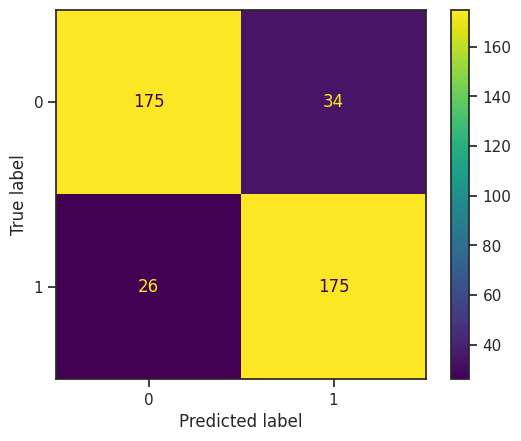

In [252]:
ConfusionMatrixDisplay.from_estimator(dtc1, x_test, y_test)
plt.show()

# SVM

In [253]:
svm = SVC()
svm.fit(x_train, y_train)
y_test_pred4 = svm.predict(x_test)

In [254]:
print(classification_report(y_test_pred4,y_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       193
           1       0.94      0.87      0.90       217

    accuracy                           0.90       410
   macro avg       0.90      0.90      0.90       410
weighted avg       0.90      0.90      0.90       410



In [255]:
#hyperparameter tuning for SVM
param_tuned= {'C': [0.1,1,5,10,100], 'gamma': [1,0.1,0.01,0.001,0.005,0.0001, 0.0005],'kernel': ['poly','rbf', 'sigmoid','linear']}

grid = RandomizedSearchCV(svm, param_tuned, scoring='accuracy', cv = 5)

grid.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 5, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.005,
                                                  0.0001, 0.0005],
                                        'kernel': ['poly', 'rbf', 'sigmoid',
                                                   'linear']},
                   scoring='accuracy')

In [256]:
print(grid.best_params_)

{'kernel': 'poly', 'gamma': 0.1, 'C': 10}


In [257]:
svm1 = SVC(C=1, gamma= 0.001, kernel= 'linear')
svm1.fit(x_train, y_train)
y_train_pred4 = svm1.predict(x_train)
y_test_pred4 = svm1.predict(x_test)

acc = svm1.score(x_test, y_test) * 100
accuracies["SVM"] = acc

In [258]:
print(classification_report(y_train_pred4,y_train))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       291
           1       0.86      0.87      0.87       324

    accuracy                           0.86       615
   macro avg       0.86      0.86      0.86       615
weighted avg       0.86      0.86      0.86       615



In [259]:
print(classification_report(y_test_pred4,y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       201
           1       0.87      0.83      0.85       209

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410



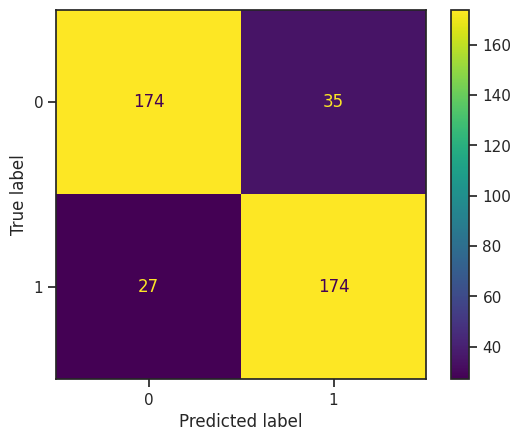

In [260]:
ConfusionMatrixDisplay.from_estimator(svm1, x_test, y_test)
plt.show()

# Random Forest

In [261]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_test_pred5 = rf.predict(x_test)

In [262]:
print(classification_report(y_test_pred5,y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       204
           1       0.99      0.96      0.97       206

    accuracy                           0.97       410
   macro avg       0.97      0.97      0.97       410
weighted avg       0.97      0.97      0.97       410



In [263]:
#hyperparameter tuning for Random forest
param_tuned = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [5,6,7,8,9,10,11,12]}
gscv_Rf = RandomizedSearchCV(rf,
                        param_tuned,
                        cv=5,
                        verbose=True, n_jobs=-1)

In [264]:
gscv_results = gscv_Rf.fit(x_train, y_train)
gscv_results.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.9577235772357723

In [265]:
gscv_results.best_params_

{'n_estimators': 60, 'max_features': 10}

In [266]:
rf1 = RandomForestClassifier(max_features= 12, n_estimators= 90)
rf1.fit(x_train, y_train)
y_train_pred5 = rf1.predict(x_train)
y_test_pred5 = rf1.predict(x_test)

acc = rf1.score(x_test, y_test) * 100
accuracies["RF"] = acc

In [267]:
print(classification_report(y_train_pred5,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       325

    accuracy                           1.00       615
   macro avg       1.00      1.00      1.00       615
weighted avg       1.00      1.00      1.00       615



In [268]:
print(classification_report(y_test_pred5,y_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       200
           1       0.97      0.93      0.95       210

    accuracy                           0.95       410
   macro avg       0.95      0.95      0.95       410
weighted avg       0.95      0.95      0.95       410



# Model Comaprison

<Figure size 768x576 with 0 Axes>

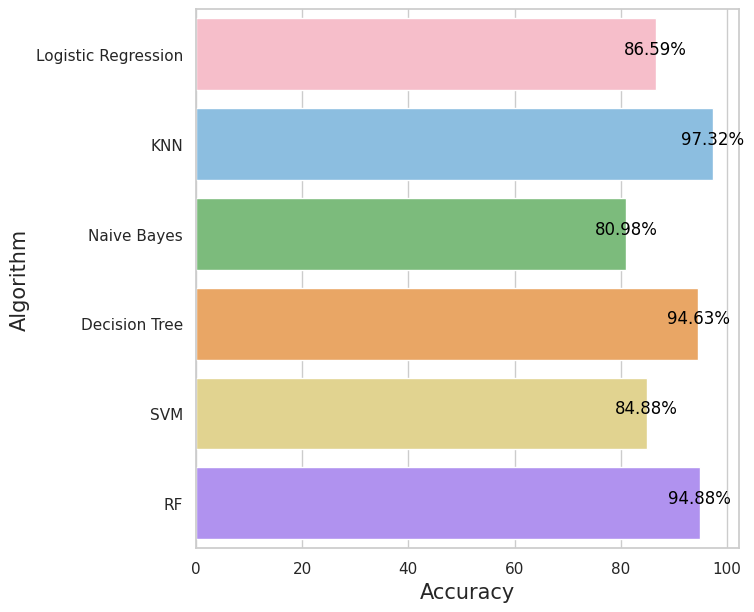

In [269]:
colors = ["#FFB5C5", "#7EC0EE", "#71C671", "#FFA54F", "#EEDC82", "#AB82FF"]

sns.set_style("whitegrid")
plt.figure(dpi=120)
plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Algorithm",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
g = sns.barplot(y=list(accuracies.keys()), x=list(accuracies.values()), palette=colors, orient="h")
i = 0
for algorithm, accuracy in accuracies.items():
    g.text(accuracy, i, "{0:.2f}%".format(accuracy), color="black", ha="center")
    i += 1
plt.show()